In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from script.loss import *
import os
import cv2
import script.models as m
from script.generator import image_mask_generator
import pickle

In [168]:
custom_objects = {
    'dice_loss': dice_loss,
    'dice_coefficient': dice_coefficient
}

In [174]:
meth_1='Macenko'
ref_1='img1'
meth_2='Vahadane'
ref_2='img1'

In [175]:
with open(f'results\\panuke\\dice\\{meth_1}\\{ref_1}\\dice_1.pkl', 'rb') as f:
                        dice_scores_img1 = pickle.load(f)

In [176]:
with open(f'results\\panuke\\dice\\{meth_2}\\{ref_2}\\dice_1.pkl', 'rb') as f:
                        dice_scores_img2 = pickle.load(f)

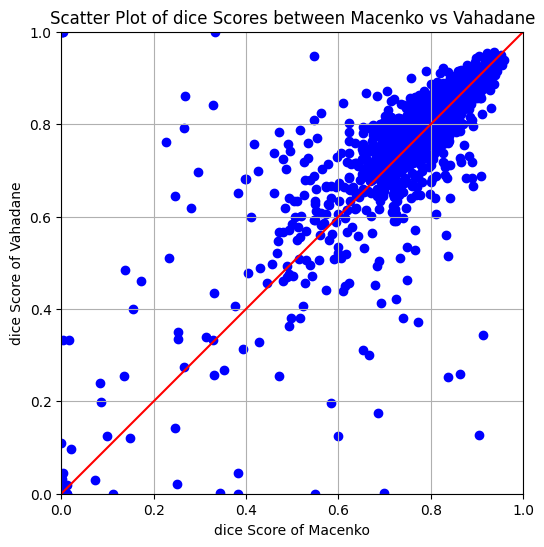

In [177]:
plt.figure(figsize=(10, 6))
plt.scatter(dice_scores_img1, dice_scores_img2, color='blue')
plt.title(f'Scatter Plot of dice Scores between {meth_1} vs {meth_2}')
plt.plot([0,1], [0,1], color='red')
plt.xlabel(f'dice Score of {meth_1}')
plt.ylabel(f'dice Score of {meth_2}')
plt.xlim(0, 1)  
plt.ylim(0, 1)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [178]:
batch_size=1
test_mask = os.listdir('datasets\\panuke\\test\\mask binary')
test_mask = ['datasets\\panuke\\test\\mask binary\\' + element for element in test_mask]
test_image_1  = os.listdir(f'datasets\\panuke\\test\\method_{meth_1}\\reference_{ref_1}')
test_image_1 = [f'datasets\\panuke\\test\\method_{meth_1}\\reference_{ref_1}\\' + element for element in test_image_1]
test_image_2  = os.listdir(f'datasets\\panuke\\test\\method_{meth_2}\\reference_{ref_2}')
test_image_2 = [f'datasets\\panuke\\test\\method_{meth_2}\\reference_{ref_2}\\' + element for element in test_image_2]

orignal_img =  os.listdir(f'datasets\\panuke\\test\\method_none\\reference_none')
orignal_img = [f'datasets\\panuke\\test\\method_none\\reference_none\\' + element for element in orignal_img]



model_1=tf.keras.models.load_model(f"Models\\attunet\\method_{meth_1}\\reference_{ref_1}\\{1}",custom_objects=custom_objects)
test_generator_1 = image_mask_generator(test_image_1, test_mask,batch_size)

predictions_1 = model_1.predict(test_generator_1, steps=(len(test_image_1) // batch_size))
predictions_1=tf.cast((tf.squeeze(predictions_1) > 0.5), tf.int32)

model_2=tf.keras.models.load_model(f"Models\\attunet\\method_{meth_2}\\reference_{ref_2}\\{1}",custom_objects=custom_objects)
test_generator_2 = image_mask_generator(test_image_1, test_mask,batch_size)

predictions_2 = model_2.predict(test_generator_2, steps=(len(test_image_1) // batch_size))
predictions_2=tf.cast((tf.squeeze(predictions_2) > 0.5), tf.int32)


 

1571/1571 [==============================] - 6s 4ms/step


In [185]:
ind=[i for i in range(len(dice_scores_img1)) if dice_scores_img1[i] >= 0.8 and dice_scores_img1[i] <= 0.98 and dice_scores_img2[i] >= 0.0 and dice_scores_img2[i] <= 0.2]
ind

[964]

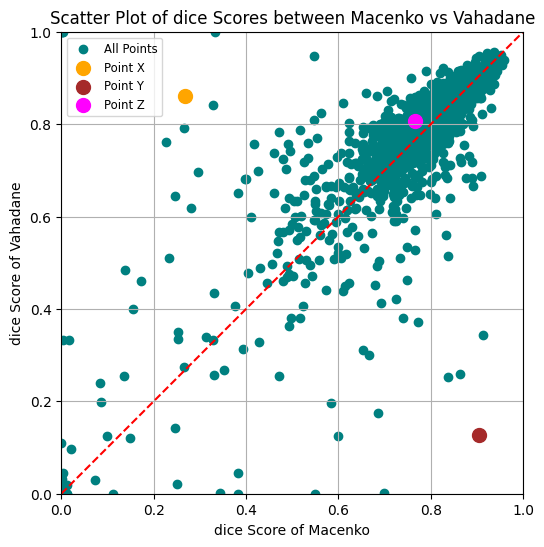

In [188]:
plt.figure(figsize=(10, 6))

# Scatter plot of all points
plt.scatter(dice_scores_img1, dice_scores_img2, color='teal', label='All Points')

# Highlighted points with more distinct colors
plt.scatter(dice_scores_img1[687], dice_scores_img2[687], color='orange', label='Point X', s=100, marker='o')
plt.scatter(dice_scores_img1[964], dice_scores_img2[964], color='brown', label='Point Y', s=100, marker='o')
plt.scatter(dice_scores_img1[22], dice_scores_img2[22], color='magenta', label='Point Z', s=100, marker='o')


plt.title(f'Scatter Plot of dice Scores between {meth_1} vs {meth_2}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Identity line with dashed style
plt.xlabel(f'dice Score of {meth_1}')
plt.ylabel(f'dice Score of {meth_2}')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize='small')
plt.show()

0.26749682 0.861507


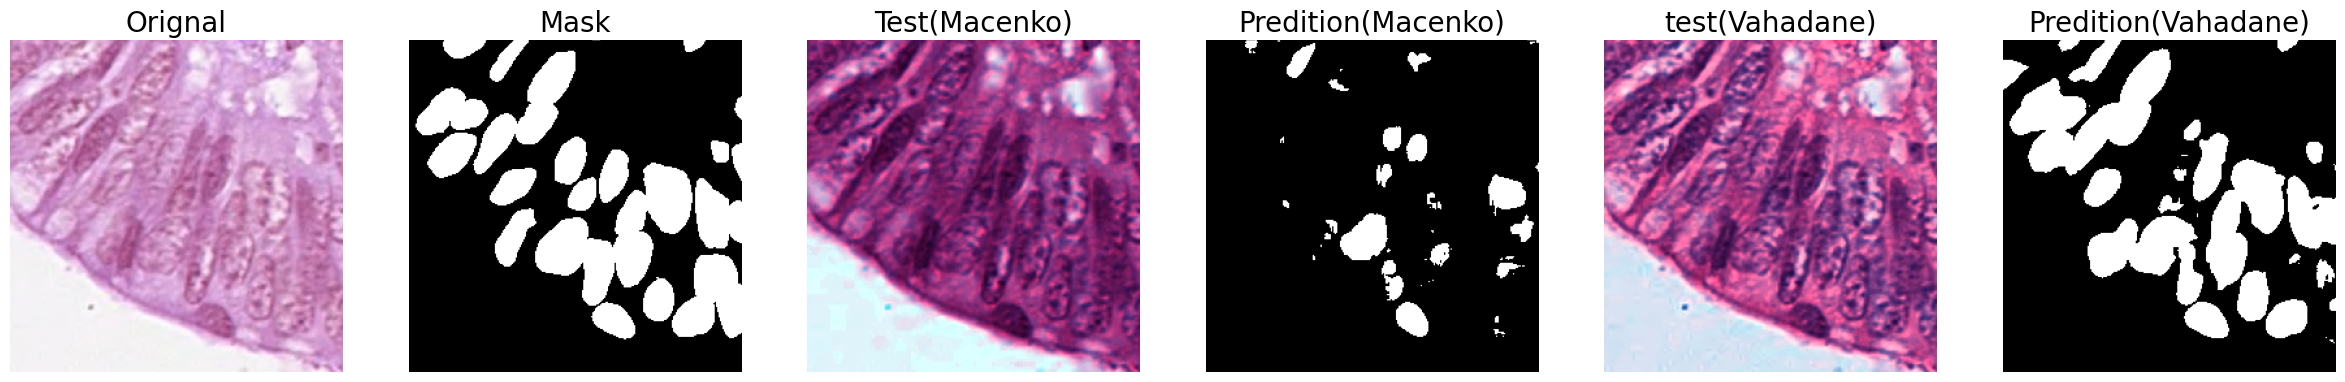

In [182]:
i= 687
print(dice_scores_img1[i],dice_scores_img2[i])
j=1
plt.figure(figsize=(30,60))
plt.subplot(10,6,j)
plt.imshow(cv2.imread(orignal_img[i]))
plt.axis('off')
plt.title('Orignal', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_mask[i], cv2.IMREAD_GRAYSCALE),cmap='gray')
plt.axis('off')
plt.title('Mask', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_image_1[i]))
plt.axis('off')
plt.title(f'Test({meth_1})', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(predictions_1[i],cmap='gray')
plt.axis('off')
plt.title(f'Predition({meth_1})', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_image_2[i]))
plt.axis('off')
plt.title(f'test({meth_2})', fontsize = 20)
    
j+=1
plt.subplot(10,6,j)
plt.imshow(predictions_2[i],cmap='gray')
plt.axis('off')
plt.title(f'Predition({meth_2})', fontsize = 20)

plt.show()
    

0.90471697 0.12633917


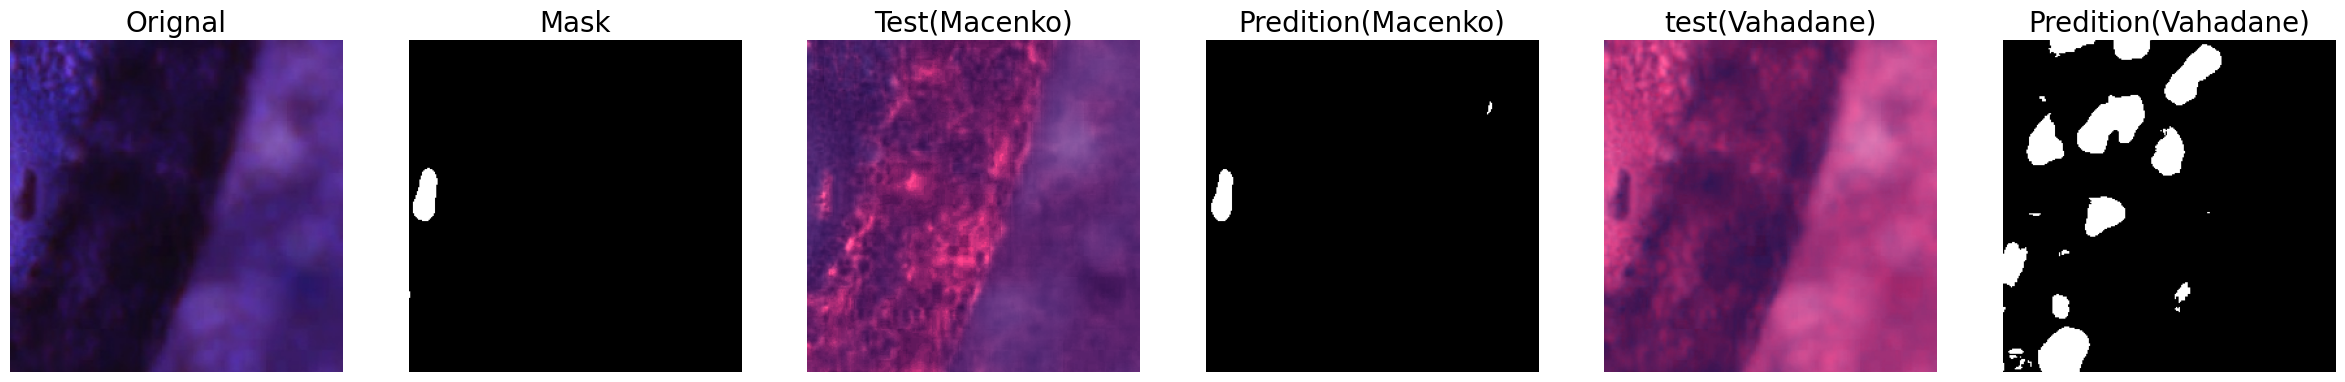

In [187]:
i= 964
print(dice_scores_img1[i],dice_scores_img2[i])
j=1
plt.figure(figsize=(30,60))
plt.subplot(10,6,j)
plt.imshow(cv2.imread(orignal_img[i]))
plt.axis('off')
plt.title('Orignal', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_mask[i], cv2.IMREAD_GRAYSCALE),cmap='gray')
plt.axis('off')
plt.title('Mask', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_image_1[i]))
plt.axis('off')
plt.title(f'Test({meth_1})', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(predictions_1[i],cmap='gray')
plt.axis('off')
plt.title(f'Predition({meth_1})', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_image_2[i]))
plt.axis('off')
plt.title(f'test({meth_2})', fontsize = 20)
    
j+=1
plt.subplot(10,6,j)
plt.imshow(predictions_2[i],cmap='gray')
plt.axis('off')
plt.title(f'Predition({meth_2})', fontsize = 20)

plt.show()
    

0.7646533 0.8064498


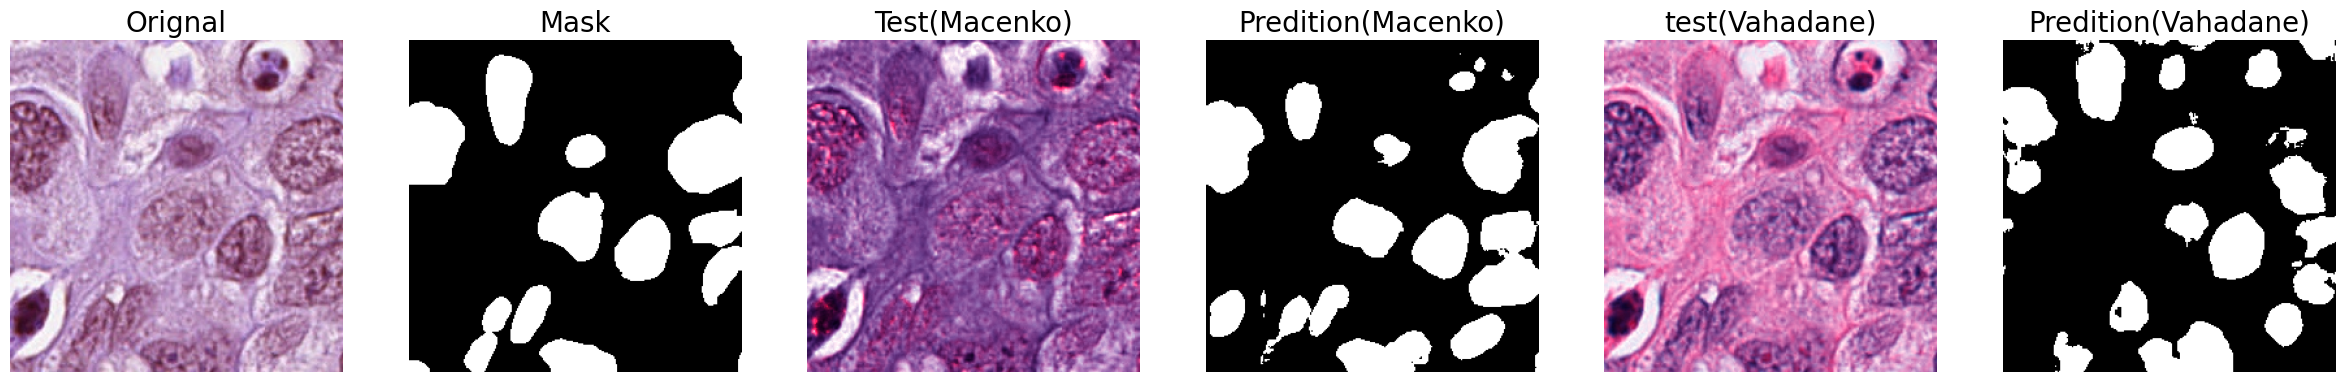

In [189]:
i= 22
print(dice_scores_img1[i],dice_scores_img2[i])
j=1
plt.figure(figsize=(30,60))
plt.subplot(10,6,j)
plt.imshow(cv2.imread(orignal_img[i]))
plt.axis('off')
plt.title('Orignal', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_mask[i], cv2.IMREAD_GRAYSCALE),cmap='gray')
plt.axis('off')
plt.title('Mask', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_image_1[i]))
plt.axis('off')
plt.title(f'Test({meth_1})', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(predictions_1[i],cmap='gray')
plt.axis('off')
plt.title(f'Predition({meth_1})', fontsize = 20)

j+=1
plt.subplot(10,6,j)
plt.imshow(cv2.imread(test_image_2[i]))
plt.axis('off')
plt.title(f'test({meth_2})', fontsize = 20)
    
j+=1
plt.subplot(10,6,j)
plt.imshow(predictions_2[i],cmap='gray')
plt.axis('off')
plt.title(f'Predition({meth_2})', fontsize = 20)

plt.show()
    